# Covid-19 : Analysis and Prediction

-----------------------

#  Introduction

On 30 January 2020 the World Health Organization (WHO) declared that the SARS-CoV-2 outbreak constitutes a Public Health Emergency of International Concern (PHEIC). The COVID-19 crisis is putting high pressure on the research community to speed up science discovery, inform the public health response and help save lives, as demonstrated by the activation by the WHO of the R&D Blueprint to accelerate diagnostics, vaccines and therapeutics for this novel virus. A necessary complementary action to accelerate and amplify impact is to ensure that research findings and data relevant to this outbreak, are shared as rapidly, openly and effectively as possible.Therefore, the European Commission urges researchers of Horizon 2020 grants with research outputs that - in any way - may be used to advance the research on COVID-19, to provide immediate open access to their related publications, data and any other output possible, in line with the guidance offered in this document. These can be projects specifically researching on the corona virus, but also other research fields/disciplines with relevance to tackle the corona crisis. Similarly, the European Commission urges research infrastructures projects, developing and/or providing access services to relevant research tools and resources, to provide priority and customised access to their services for research on COVID-19.More particularly, the European Commission strongly encourages beneficiaries to follow the guidelines below, thereby exceeding the current Open Access requirements of Horizon 2020 and going beyond the legal obligations enshrined in the Horizon 2020 Grant Agreement (GA), in order to address the current public health emergency. The guidelines build on both the commitments made by the European Commission as a signatory of the Statement on Data Sharing in Public Health Emergency, and on the principles established in the GA. 

Importing all the Libraries that we need to do this project work

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 15th November, 2020

In [3]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Shape of the dataset

In [4]:
df.shape

(306429, 8)

Information regarding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


We will convert the ObservationDate and Last Update to datetime since they are currently taken as object

The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [7]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
305664,305665,2021-05-29,NaN,Afghanistan,2021-05-30 04:20:55,70111,2899,57281
305665,305666,2021-05-29,NaN,Albania,2021-05-30 04:20:55,132297,2449,129215
305666,305667,2021-05-29,NaN,Algeria,2021-05-30 04:20:55,128456,3460,89419
305667,305668,2021-05-29,NaN,Andorra,2021-05-30 04:20:55,13693,127,13416
305668,305669,2021-05-29,NaN,Angola,2021-05-30 04:20:55,34180,757,27646
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641,2335,95289
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147,245,0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364,1,1324
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550,1738,83790


Out of the 156291 records we are now left with only 758 and many of the records don't have the Province defined

These are the provinces that are basically a not part of China

**Whenever provinces are null, we replace them with the country name and group mainland China and China together in China**

In [8]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     172
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [9]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [10]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We are performing the encoding of the country to CountryID and Province to ProvinceID

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
305664,305665,2021-05-29,Afghanistan,Afghanistan,2021-05-30 04:20:55,70111,2899,57281,3,0
305665,305666,2021-05-29,Albania,Albania,2021-05-30 04:20:55,132297,2449,129215,10,1
305666,305667,2021-05-29,Algeria,Algeria,2021-05-30 04:20:55,128456,3460,89419,12,2
305667,305668,2021-05-29,Andorra,Andorra,2021-05-30 04:20:55,13693,127,13416,22,3
305668,305669,2021-05-29,Angola,Angola,2021-05-30 04:20:55,34180,757,27646,23,4


## Presenting the Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

<AxesSubplot:>

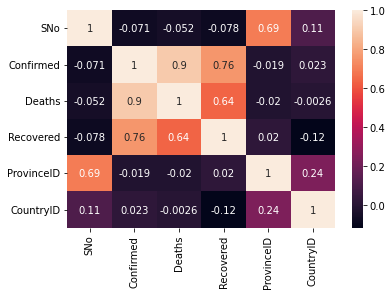

In [12]:
corr = df_update.corr()
sns.heatmap(corr, annot = True)

**********************

## A. Finding out How many countries were affected by Covid-19

In [13]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam'
 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands'
 'Gibraltar' 'Liechtenstein' 'Poland' 'Tuni

Total of 226 countries are affected by this virus, where the epicentre of this virus is Hubei Province of Mainland China 

***********

## B. Percentage of confirmed cases per country through the Pie-chart

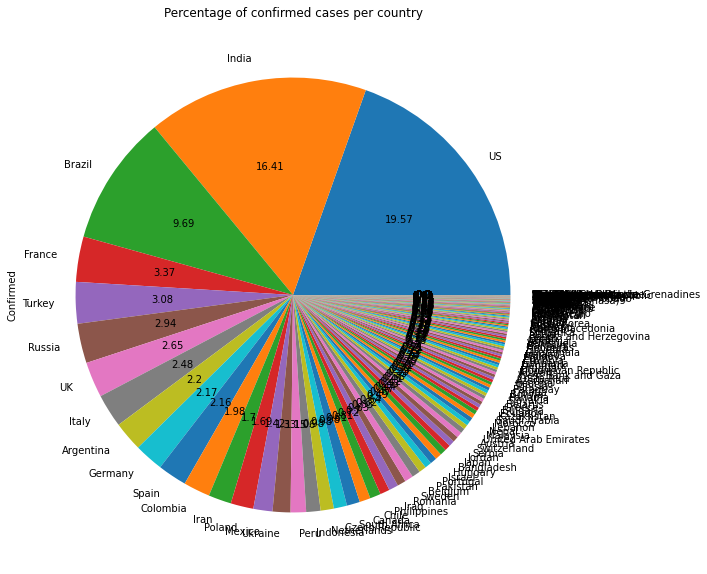

In [14]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

Approximately 21% of the total confirmed cases of the world is found at United States of America

After USA, there are India and Brazil;, the 2nd and 3rd most affected countries in the world where the percentage of confirmed cases reported with respect to the world is 16.27% and 10.78% respectively

****************

## C. Top 5 countries having most number of confirmed cases till 15th November, 2020

**The overall number of global coronavirus cases has surpassed the 43 million mark, while the deaths have increased to over1.16 million, according to the Johns Hopkins University.**

1. The United States tops 8.7 million coronavirus case. The United States on Tuesday surpassed 8,704,606 novel coronavirus cases, according to Johns Hopkins University. The pandemic has now claimed the lives of at least 225,735 people in the United States, which leads the world in the number of confirmed infections.

2. India is now the second worst-affected country by COVID-19.India's novel Coronavirus tally crossed the 7.9 million mark on Tuesday with detection of less than 40,000 new cases in the last 24 hours, the Indian Health Ministry said. The state of Maharashtra, Andhra Pradesh, Tamil Nadu, Karnataka and Uttar Pradesh were among the five worst-affected states in India.

3. Brazil with more than 5.4 million cases. Third, in the list of the worst affected countries, Brazil has more than 5.4 million confirmed cases, according to Johns Hopkins University. The country has so far reported 5,409,854 total cases and 157,397 deaths due to coronavirus.

4. Russia with more than 1.5 million cases. Russia reported more than 1,537,142 cases of coronavirus infections so far and 26,409 deaths. The country has the fourth-highest number of infections behind the United States, India and Brazil, but the number of new cases has seen a stellar rise every day in the past month.

5. France with 1.2 million coronavirus cases. France&#39;s novel coronavirus tally crossed the 1.2 million mark on Tuesday with the death toll rising to 35,052, according to John Hopkins University.

In [19]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,33251939,0,594306
1,India,27894800,25454320,325972
2,Brazil,16471600,14496224,461057
3,France,5719877,390878,109518
4,Turkey,5235978,5094279,47271


**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [20]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,33251939,0,594306,0.000000,0.020000
1,India,27894800,25454320,325972,0.910000,0.010000
2,Brazil,16471600,14496224,461057,0.880000,0.030000
3,France,5719877,390878,109518,0.070000,0.020000
4,Turkey,5235978,5094279,47271,0.970000,0.010000


*************

## D. Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries till 15th November, 2020

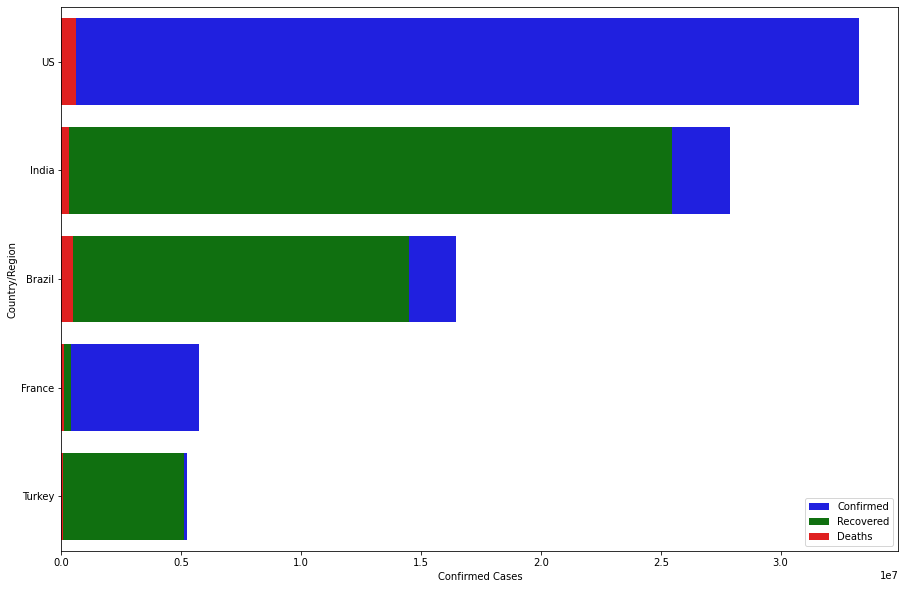

In [21]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

*************

********************
******************

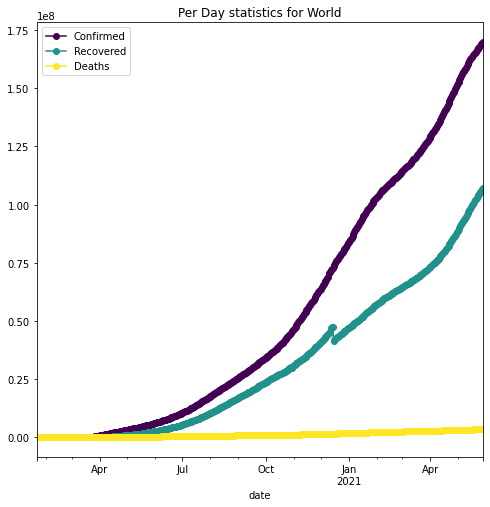

In [23]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

Here the perday statistics tells us the spreading is exponentially increasing day by day since the end of the March, 2020. Now after 5 months later the situation is worser than the previous days and still the cases are increasing exponentially without any kind of stoppings in the increment of the cases.

### Increment in the stats in the recent times (from 8th Aug, 2020 to 15th November, 2020)

In [24]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,167757188,104738872,3481152,12752,531832
490,2021-05-26,168325385,105294673,3493908,12756,568197
491,2021-05-27,168879746,105992009,3506661,12753,554361
492,2021-05-28,169379664,106546957,3518481,11820,499918
493,2021-05-29,169860488,107054552,3528983,10502,480824


Here on 15th November 2020 the number of confirmed cases has raised to 54283840, which is huge in numbers and almost 57% of the total population of the world. In that confirmed cases the Death toll rises to 1312505 and still it is increasing day by day. 

**Global confirmed cases have been on an increasing trend and this has been largely contributed by Brazil and US at this moment as can be seen in the pie-chart. 29th July saw the highest increase in confirmed cases with 3.37L cases in a day.**

### Total Confirmed Cases in the World (Excluding China) upto 15th November, 2020

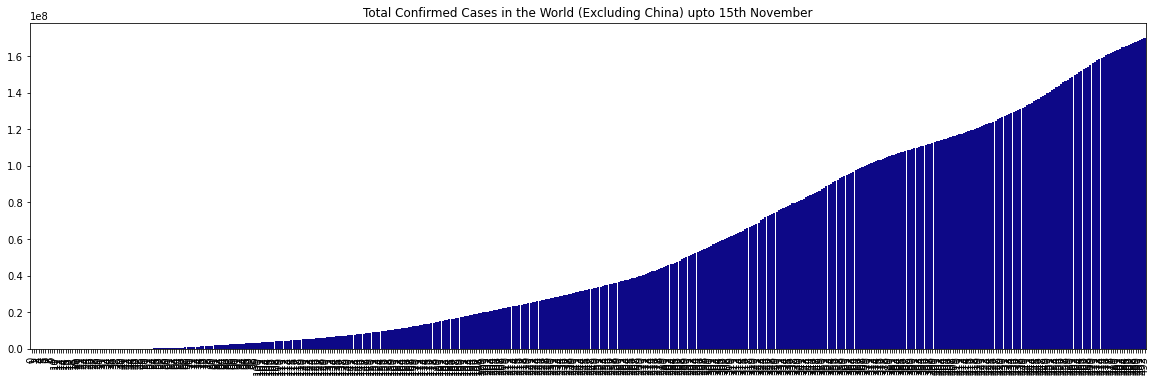

In [25]:
num_plot_global['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Confirmed Cases in the World (Excluding China) upto 15th November',colormap='plasma')
plt.show()

### Total Recovered Cases in the World (Excluding China) upto 15th November, 2020

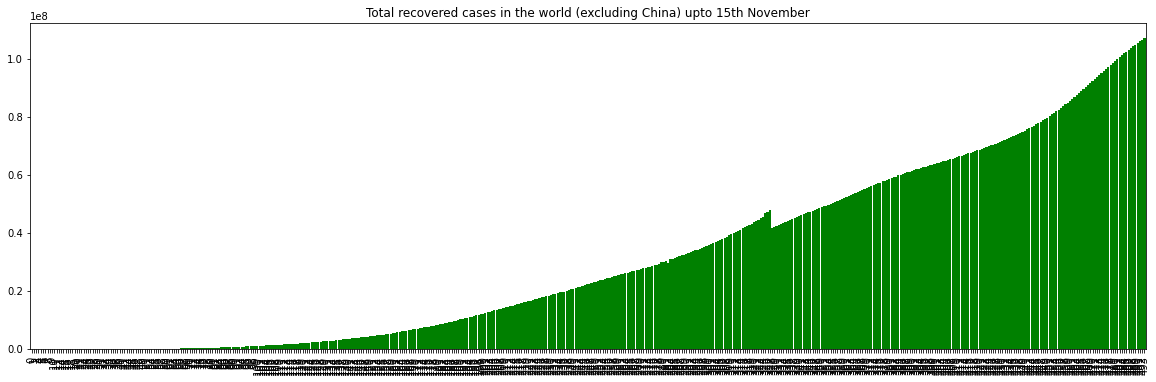

In [26]:
num_plot_global['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in the world (excluding China) upto 15th November',colormap='ocean')
plt.show()

### Total Death Cases in the World (Excluding China) upto 15th November, 2020

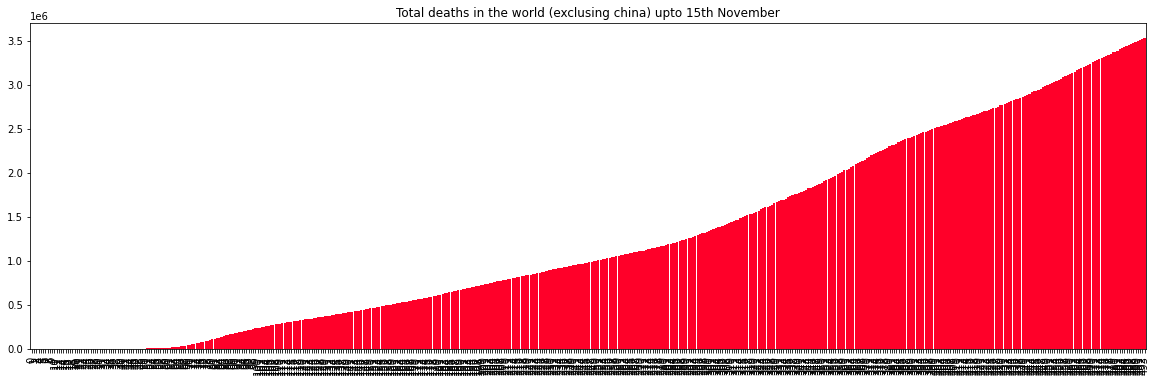

In [27]:
num_plot_global['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total deaths in the world (exclusing china) upto 15th November',colormap='gist_rainbow')
plt.show()

### Total Confirmed Cases Increase in the World (Excluding China) upto 15th November, 2020

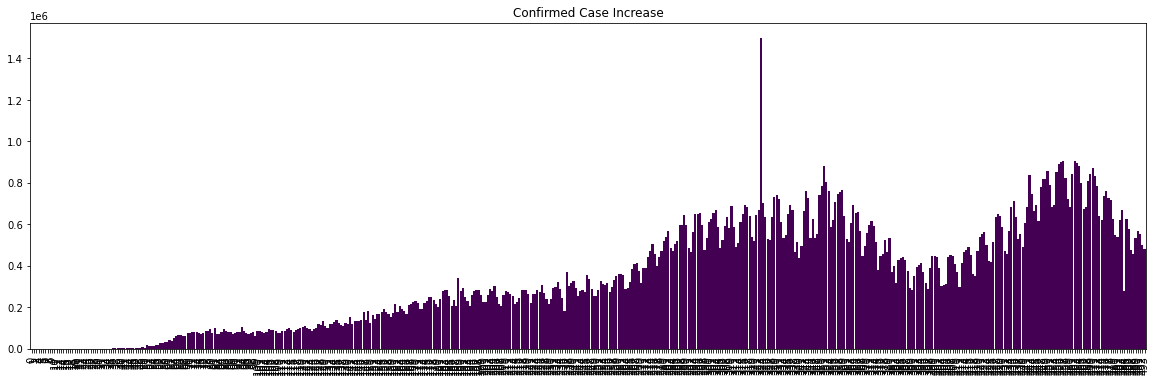

In [29]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

### Death Cases Increase in the World (Excluding China) upto 15th November, 2020

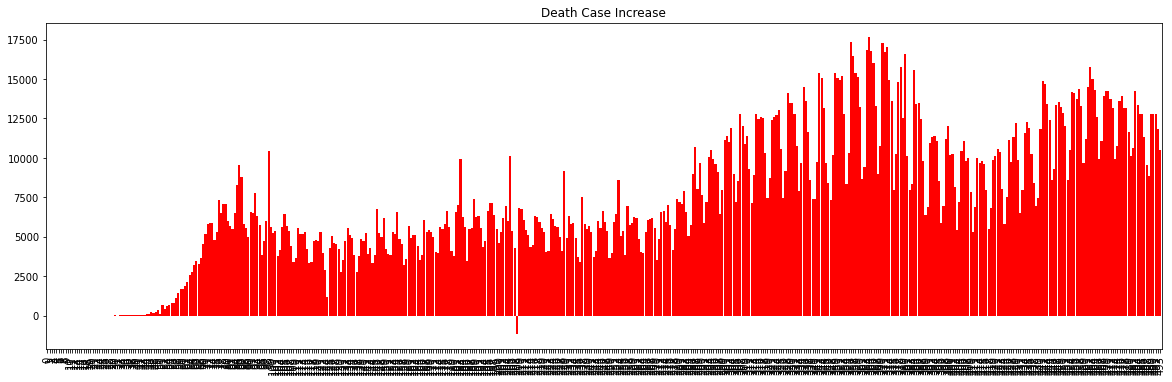

In [30]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='autumn')
plt.show()


Death cases have also been on the rise globally as seen below. 29th April has seen a drastic increase in the number of deaths in a single day(10485).

************************

# Chapter 5 : INDIA - The Fastest growing epicentre

The first case of coronavirus in India was identified on 30 January 2020. By 3 February, the number of cases increased to 3. On 4 March, 22 new cases were identified, of which 14 were from a group of tourists who had arrived from Italy (The Week 2020). In March, India also reported its first coronavirus-related death. The number of confirmed cases in India crossed 1000 on 29 March, 30,000 on 28 April, and 180,000 on 30 May. The death toll crossed 50 on 1 April, 1000 on 28 April, and 5000 on 30 May. As of 25th November 2020, the numbers of infected cases and deaths are 9,227,557 and 134,804, respectively (World meter 2020b).On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days, limiting movement of the entire 1.3 billion population of India as a preventive measure against the COVID-19 pandemic in India.It was ordered after a 14-hour voluntary public curfew on 22 March, followed by enforcement of a series of regulations in the country's COVID-19 affected regions.

**Observing the cases in India. Confirmed cases are increasing in India each day. There is a need to get a flatter curve for confirmed cases which currently is in upswing with a steep increase since past few days.**

### Per Day Statistics for India till 15th November, 2020

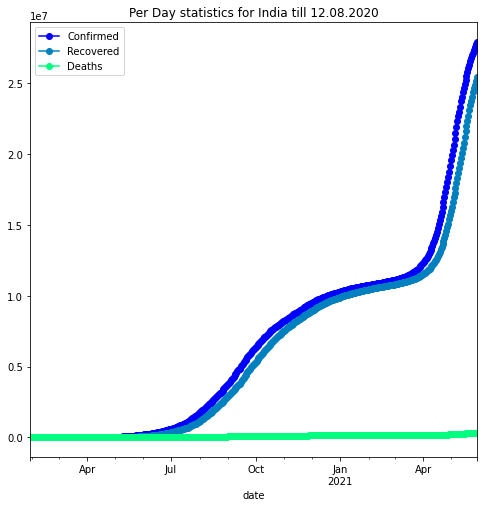

In [78]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India till 12.08.2020',marker='o')
num_plot_india=num_plot.reset_index()

### Cases reported in the recent times in India

In [79]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
476,2021-05-20,26031991,22712735,291331,259551,4209
477,2021-05-21,26289290,23070365,295525,257299,4194
478,2021-05-22,26530132,23425467,299266,240842,3741
479,2021-05-23,26752447,23728011,303720,222315,4454
480,2021-05-24,26948874,24054861,307231,196427,3511
481,2021-05-25,27157795,24350816,311388,208921,4157
482,2021-05-26,27369093,24633951,315235,211298,3847
483,2021-05-27,27555457,24893410,318895,186364,3660
484,2021-05-28,27729247,25178011,322512,173790,3617
485,2021-05-29,27894800,25454320,325972,165553,3460


**8th August has recorded highest number of COVID19 confirmed cases in India in a day (64399). In the last few days the peak in cases have been increasing almost everyday. Note: We are not considering the stats on 28th and 29th July because it seems to be incorrect.**

### Confirmed cases increased in India till 15th November, 2020 

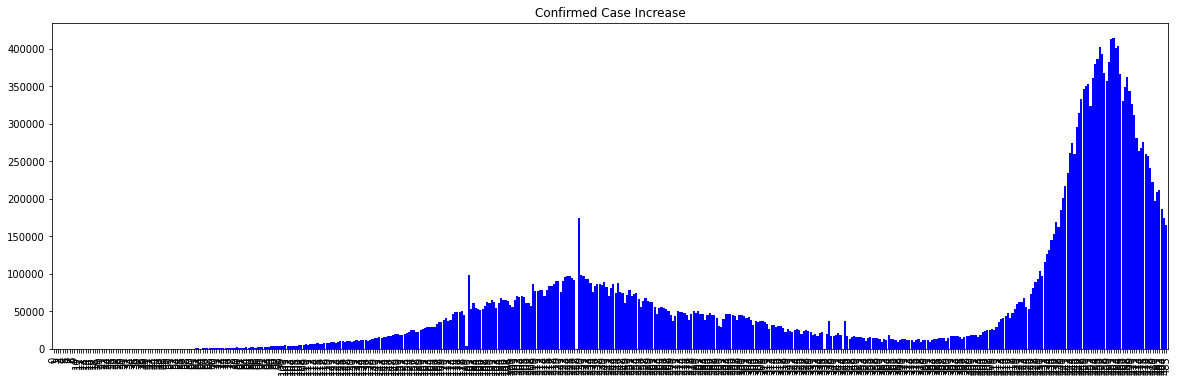

In [33]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

**The day to day confirmed cases are increasing exponentially and everyday India is creating a new record on the per day confirmed cases**

### Death cases increased in India till 15th November, 2020

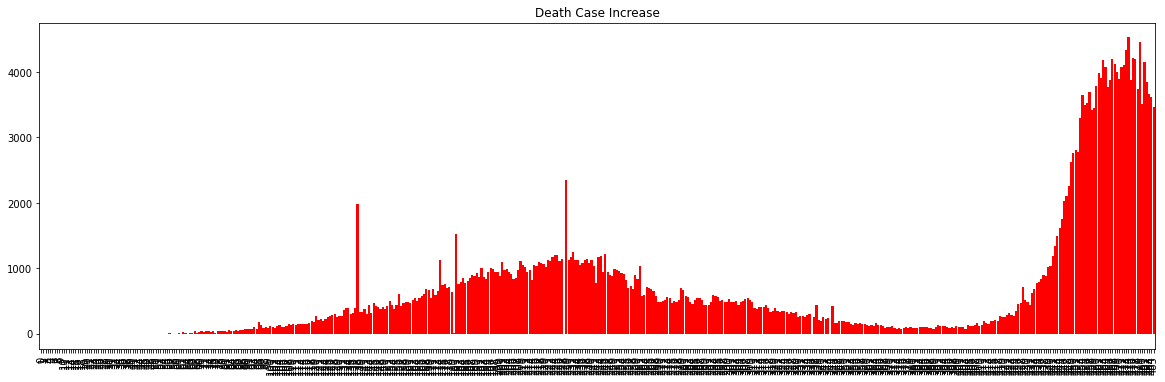

In [34]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Death Case Increase')
plt.show()

**As the day to day confirmed cases are increasing exponentially thedeath cases are also increasing in the exponential manner with a rate of min 1000 people per day. The highest peak have obtained of 2000 people have died in a day. And the number is increasing daily**

### Total no. of confimed cases in India till 15th November, 2020

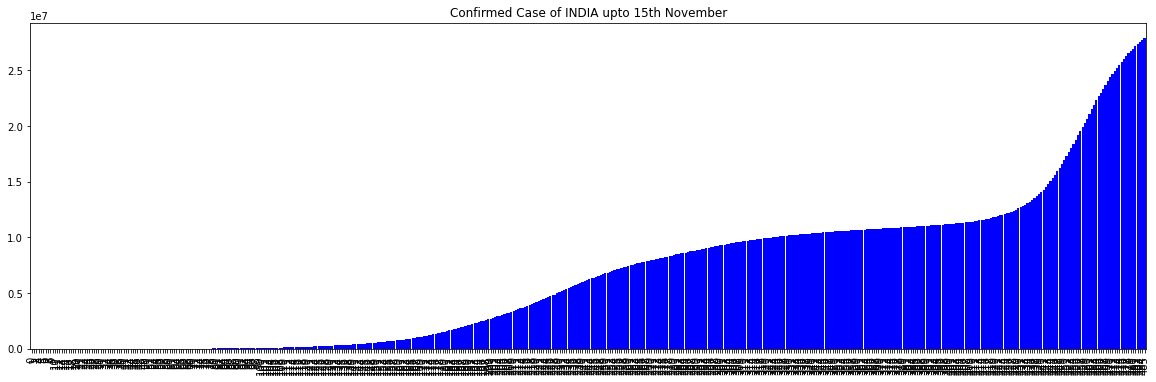

In [35]:
num_plot_india['Confirmed'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case of INDIA upto 15th November')
plt.show()

### Total no. of Recovered cases in India till 15th November, 2020

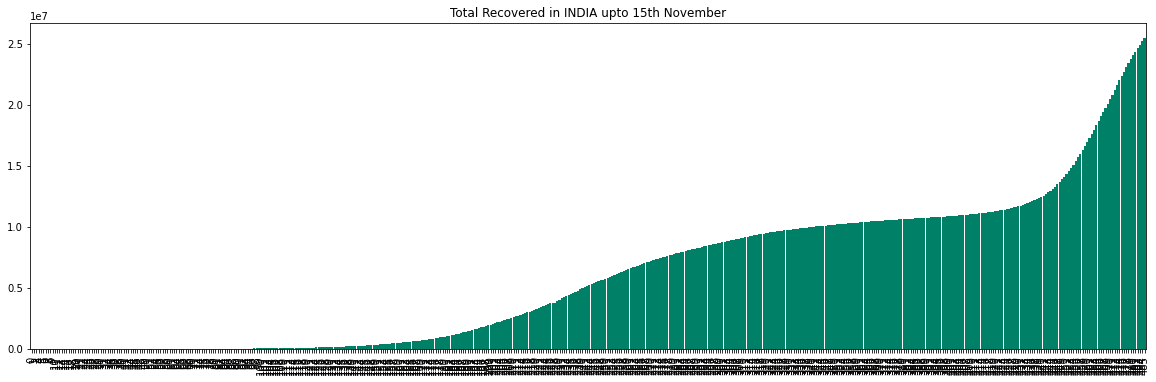

In [36]:
num_plot_india['Recovered'].plot(kind='bar',width=0.95,colormap='summer',figsize=(20,6),title='Total Recovered in INDIA upto 15th November')
plt.show()

### Total no. of Death cases in India till 15th November, 2020

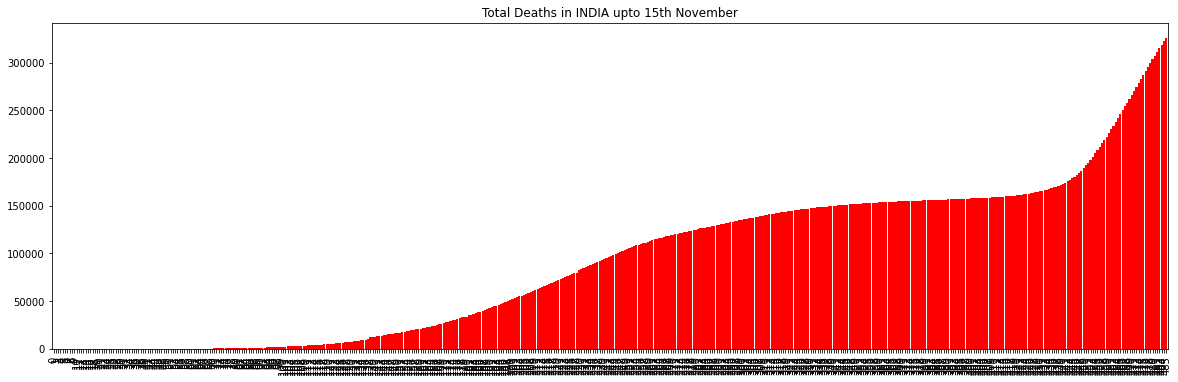

In [37]:
num_plot_india['Deaths'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Total Deaths in INDIA upto 15th November')
plt.show()

**In the current situation of pandemic the confirmed cases are creating new record daily as well as the death cases. The death toll rises upto 50000 still it is not flattening anymore. Not a single chance of flattening has seen in the curve rather the growth rate is exponentially. India is yet to have the worst situation like United States are having** 

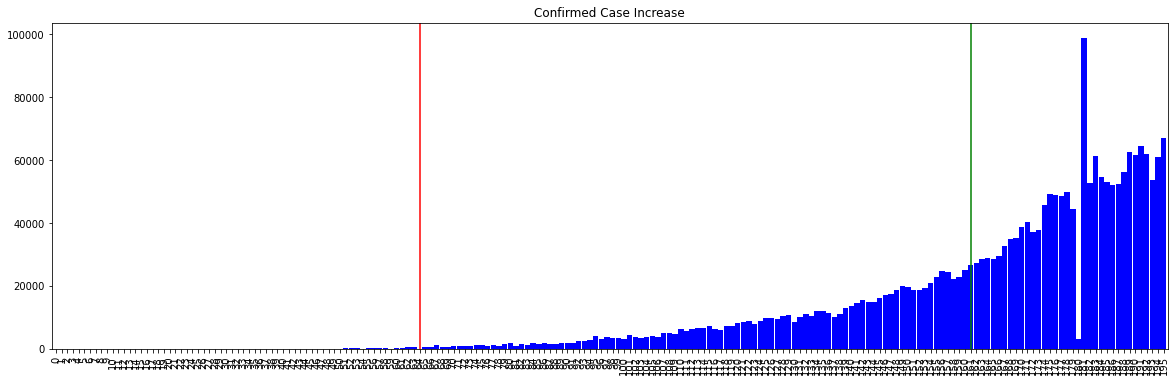

In [102]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.axvline (x=64, color = 'r')
plt.axvline (x= 161, color = 'g')
plt.show()

**India Lockdown : After watching the world suffering from the virus, India has take precaution earlier and imposed lockdown on 23rd march, 2020. After that the cases were increasing in a daily basis and exponentially, and the toll reached to 40000 mark. At that time the government decided to revoke the lockdown. As a result the cases were raised to 2500000 (As of the data of 12th August, 2020). India is having the worst condition in the world. The cases are increasing 60000 daily. There is no sign of flattening the curve rather it is exponentially increasing and the curve is obtaining more and more steep slope day by day. INDIA, IN THE PERSPECTIVE OF LOCKDOWN WAS TOTALLY UNSUCCESSFUL, AND BECAME 3RD HIGHEST INFECTED COUNTRY IN THE WORLD**  

********************

# Chapter 8 : The Prediction

While it is impossible to estimate the eventual number of cases for the novel coronavirus, there was an exercise carried out earlier this year, aimed at projecting the numbers for Wuhan in China. In a recent article on Cell Discovery in Nature, a group of Chinese scientists attempted to estimate the eventual number of infections and deaths due to the disease (COVID-19) in Wuhan. An infectious disease dynamics model called SEIR (Susceptible-Exposed-Infectious-Resistant) was used to model and predict the number of COVID-19 cases. The SEIR model proved to be predictive for a variety of acute infectious diseases like Ebola and SARS.

The model classifies the population into four mutually exclusive groups: susceptible (at risk of contracting the disease), exposed (infected but not yet infectious), infectious (capable of transmitting the disease), and removed (those who recover or die from the disease). A susceptible individual can become exposed only through contact with some infectious person. Susceptible individuals first enter the exposed stage, during which they may have a low level of infectivity; they become infectious thereafter. The infection rate represents the probability of transmission from an infectious person to a susceptible one. The incubation rate (the reciprocal of the average duration of incubation) is the rate at which latent individuals become infectious; and the removal rate is the reciprocal of the average duration of infection. The basic reproduction number (BRN) is the expected number of cases directly generated by one case. A BRN greater than one indicates that the outbreak is self-sustaining, while a BRN less than one indicates that the number of new cases decreases over time and eventually the outbreak will stop. Ideally, the BRN should be reduced in order to slow down an epidemic.


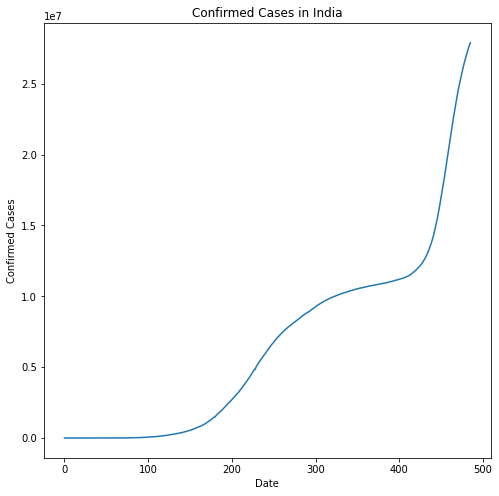

In [88]:
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [89]:
train = num_plot_india.iloc[:-3,:2]
test = num_plot_india.iloc[-3:,:2]

In [90]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [91]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2021-01-09','2021-01-15','2021-01-24','2021-02-05','2021-02-17','2021-02-28','2021-03-18','2021-04-08','2021-04-28'], yearly_seasonality=True)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -21.6519


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2172.74    0.00422407       1125.97      0.3783      0.3783      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2394.23     0.0122995       5181.32           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2423.06      0.014081        1080.6           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2458.54     0.0524693       692.954           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2462.51   0.000930779       948.692       2.312      0.2312      559   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

------------

## A. Prediction for India in the upcoming days based on the current situation if Vaccination is not started

<AxesSubplot:xlabel='ds'>

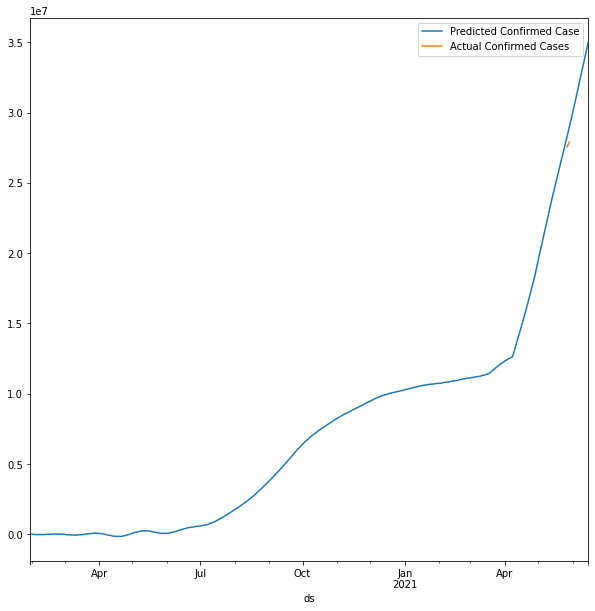

In [92]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
x='ds'
y='yhat'
ax = forecast.plot(x,y,label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

## B. Prediction of the Growth Rate of the Confirmed Cases

In [93]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='90 days', period='40 days', horizon = '10 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-05-21 00:00:00 and 2021-05-16 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -10.871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       577.869    0.00174699       458.191           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       590.648     0.0207577       910.012           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       594.182    0.00683118        683.84           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       598.611    0.00612868       552.828           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       602.491    0.00288652        944.49           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha   

Initial log joint probability = -13.0346
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       861.963    0.00133652       1509.38           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       916.439   0.000311692       674.803           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       944.811    0.00544931       5138.66           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        985.08   0.000266573       769.529           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       987.109   1.96649e-05       245.117           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -10.568
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2403.97    0.00111115        2914.8           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2409.24   0.000303189       318.804           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2409.56   9.95388e-05         140.1           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       2409.56   9.66395e-05       52.1615      0.9144      0.9144      346   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -8.77636
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.858298e+10,136319.394278,60408.095108,0.004628,0.001177,0.5
1,2 days,3.180526e+10,178340.305769,80367.542487,0.007082,0.001289,0.5
2,3 days,4.898697e+10,221330.004670,103199.747171,0.010956,0.003531,0.4
3,4 days,7.260599e+10,269454.979053,128608.846928,0.016759,0.006343,0.3
4,5 days,1.027427e+11,320534.993149,155746.482941,0.023899,0.008386,0.2


In [94]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.858298e+10,136319.394278,60408.095108,0.004628,0.001177,0.5
1,2 days,3.180526e+10,178340.305769,80367.542487,0.007082,0.001289,0.5
2,3 days,4.898697e+10,221330.004670,103199.747171,0.010956,0.003531,0.4
3,4 days,7.260599e+10,269454.979053,128608.846928,0.016759,0.006343,0.3
4,5 days,1.027427e+11,320534.993149,155746.482941,0.023899,0.008386,0.2


In [95]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
488,2021-06-01,3.197613e+07,2.984328e+07,3.009970e+07,3.197613e+07,3.197613e+07,-2.001759e+06,-2.001759e+06,-2.001759e+06,-7848.604341,-7848.604341,-7848.604341,-1.993911e+06,-1.993911e+06,-1.993911e+06,0.0,0.0,0.0,2.997437e+07
489,2021-06-02,3.234334e+07,3.019043e+07,3.045801e+07,3.234334e+07,3.234334e+07,-2.020260e+06,-2.020260e+06,-2.020260e+06,-5310.688980,-5310.688980,-5310.688980,-2.014949e+06,-2.014949e+06,-2.014949e+06,0.0,0.0,0.0,3.032308e+07
490,2021-06-03,3.271054e+07,3.055284e+07,3.083018e+07,3.271054e+07,3.271054e+07,-2.027531e+06,-2.027531e+06,-2.027531e+06,5478.408288,5478.408288,5478.408288,-2.033009e+06,-2.033009e+06,-2.033009e+06,0.0,0.0,0.0,3.068301e+07
491,2021-06-04,3.307774e+07,3.089652e+07,3.117716e+07,3.307774e+07,3.307774e+07,-2.043120e+06,-2.043120e+06,-2.043120e+06,5115.644996,5115.644996,5115.644996,-2.048235e+06,-2.048235e+06,-2.048235e+06,0.0,0.0,0.0,3.103462e+07
492,2021-06-05,3.344495e+07,3.124670e+07,3.152632e+07,3.344495e+07,3.344495e+07,-2.055422e+06,-2.055422e+06,-2.055422e+06,5408.252144,5408.252144,5408.252144,-2.060830e+06,-2.060830e+06,-2.060830e+06,0.0,0.0,0.0,3.138952e+07
493,2021-06-06,3.381215e+07,3.160040e+07,3.188615e+07,3.381215e+07,3.381215e+07,-2.067942e+06,-2.067942e+06,-2.067942e+06,3104.014123,3104.014123,3104.014123,-2.071046e+06,-2.071046e+06,-2.071046e+06,0.0,0.0,0.0,3.174421e+07
494,2021-06-07,3.417935e+07,3.195143e+07,3.224280e+07,3.417935e+07,3.417935e+07,-2.085127e+06,-2.085127e+06,-2.085127e+06,-5947.026230,-5947.026230,-5947.026230,-2.079179e+06,-2.079179e+06,-2.079179e+06,0.0,0.0,0.0,3.209423e+07
495,2021-06-08,3.454656e+07,3.229156e+07,3.262915e+07,3.454653e+07,3.455876e+07,-2.093408e+06,-2.093408e+06,-2.093408e+06,-7848.604341,-7848.604341,-7848.604341,-2.085559e+06,-2.085559e+06,-2.085559e+06,0.0,0.0,0.0,3.245315e+07
496,2021-06-09,3.491376e+07,3.265649e+07,3.297553e+07,3.490831e+07,3.493979e+07,-2.095850e+06,-2.095850e+06,-2.095850e+06,-5310.688980,-5310.688980,-5310.688980,-2.090539e+06,-2.090539e+06,-2.090539e+06,0.0,0.0,0.0,3.281791e+07
497,2021-06-10,3.528096e+07,3.304369e+07,3.336385e+07,3.525294e+07,3.532249e+07,-2.089011e+06,-2.089011e+06,-2.089011e+06,5478.408288,5478.408288,5478.408288,-2.094490e+06,-2.094490e+06,-2.094490e+06,0.0,0.0,0.0,3.319195e+07


## C. Prediction for India in the upcoming months based on the current situation

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -63.1397
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1211.1     0.0880561       1143.89      0.2249           1      141   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1284.73     0.0127789       95.6898           1           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1294.86    0.00789867       201.507           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       1298.15   7.68801e-05       26.9416   4.102e-06       0.001      473  LS failed, Hessian reset 
     399       1300.92     0.0101147       8.74009           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1302.8    0.00520382    

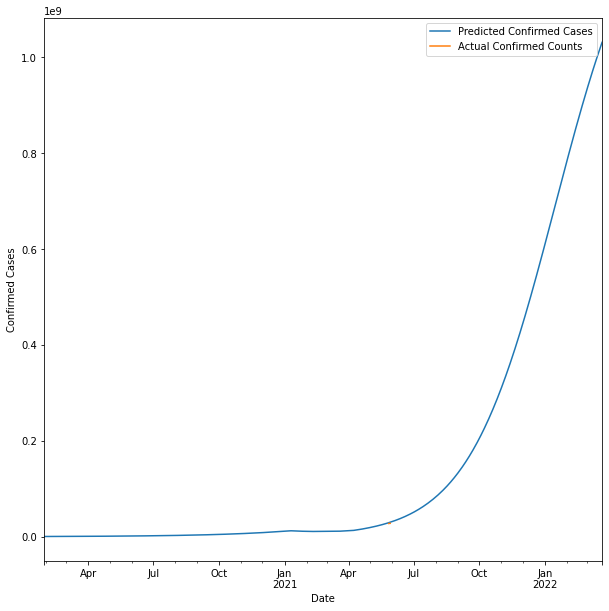

In [96]:
from fbprophet import Prophet
model_india = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2021-01-09','2021-01-15','2021-01-24','2021-02-05','2021-02-17','2021-02-28','2021-03-18','2021-04-08','2021-04-28'])
pop = 1380004385 #from worldometers
train['cap'] = pop
model_india.fit(train)
# Future Prediction
future_dates = model_india.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_india.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

## D. Forecast Model

In [98]:
forecast.iloc[360:390]

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2021-01-24,1.149207e+07,1380004385,1.018493e+07,1.280798e+07,1.149207e+07,1.149207e+07,3961.829966,3961.829966,3961.829966,3961.829966,3961.829966,3961.829966,0.0,0.0,0.0,1.149604e+07
361,2021-01-25,1.144994e+07,1380004385,1.004835e+07,1.275604e+07,1.144994e+07,1.144994e+07,-5633.266273,-5633.266273,-5633.266273,-5633.266273,-5633.266273,-5633.266273,0.0,0.0,0.0,1.144431e+07
362,2021-01-26,1.140796e+07,1380004385,1.010707e+07,1.263230e+07,1.140796e+07,1.140796e+07,-8888.620851,-8888.620851,-8888.620851,-8888.620851,-8888.620851,-8888.620851,0.0,0.0,0.0,1.139908e+07
363,2021-01-27,1.136614e+07,1380004385,1.007091e+07,1.269591e+07,1.136614e+07,1.136614e+07,-8519.186546,-8519.186546,-8519.186546,-8519.186546,-8519.186546,-8519.186546,0.0,0.0,0.0,1.135762e+07
364,2021-01-28,1.132447e+07,1380004385,9.961240e+06,1.262563e+07,1.132447e+07,1.132447e+07,6907.220490,6907.220490,6907.220490,6907.220490,6907.220490,6907.220490,0.0,0.0,0.0,1.133137e+07
365,2021-01-29,1.128295e+07,1380004385,1.005765e+07,1.265072e+07,1.128295e+07,1.128295e+07,6551.465715,6551.465715,6551.465715,6551.465715,6551.465715,6551.465715,0.0,0.0,0.0,1.128950e+07
366,2021-01-30,1.124157e+07,1380004385,9.809021e+06,1.250061e+07,1.124157e+07,1.124157e+07,5620.557498,5620.557498,5620.557498,5620.557498,5620.557498,5620.557498,0.0,0.0,0.0,1.124719e+07
367,2021-01-31,1.120035e+07,1380004385,9.993274e+06,1.247776e+07,1.120035e+07,1.120035e+07,3961.829966,3961.829966,3961.829966,3961.829966,3961.829966,3961.829966,0.0,0.0,0.0,1.120432e+07
368,2021-02-01,1.115928e+07,1380004385,9.898713e+06,1.242517e+07,1.115928e+07,1.115928e+07,-5633.266273,-5633.266273,-5633.266273,-5633.266273,-5633.266273,-5633.266273,0.0,0.0,0.0,1.115365e+07
369,2021-02-02,1.111836e+07,1380004385,9.890135e+06,1.236799e+07,1.111836e+07,1.111836e+07,-8888.620851,-8888.620851,-8888.620851,-8888.620851,-8888.620851,-8888.620851,0.0,0.0,0.0,1.110947e+07


--------------

# Chapter 10 : Conclusion :

**For the countries like India, USA, Brazil, they are the worst candidates of this pandemic, and the had suffered the most and still sufferring. If we have to fought against the virus, we have test the samples in a huge number. Testing is the only without lockdown the country, as Japan is doing. Testing is the most essential thing, without which we cannot trace the curve and it will increase with a high slope.**

**According to the prediction, India will be seeing the flattened curve of daily confirmed cases in the month of March and April, 2021. And at that moment the country will have all total 50000000 confirmed cases, which will be the nightmare for the country. If the vaccine is available then it will be another thing, but if the confirmed cases are increasing at the rate of 60k to 70k, and eventually it will increase to 90k to 100k, 1/3 of the total population of India will be effected**

COVID-19 health crisis has exacerbated violence against doctors and healthcare workers. They have become unforeseen targets in the fight against the current pandemic. For a sustainable protection of the healthcare workers, the current Ordinance needs to be further extended and incorporated into existing laws in the form of a strict, permanent legislation that is strictly enforced. It would improve the safety of the very individuals who carry out their duties fearlessly for the benefit of sick patients, either during a health crisis such as the current pandemic or during traditional times.

### Bibliography 

Chinese Data :
http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm

Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html

Macau Government: https://www.ssm.gov.mo/portal/

Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0

US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html

Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html

Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance

European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases

Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19

Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus

Picture courtesy : Johns Hopkins University dashboard


### Stay Home! Stay Safe!

### Thank You!